In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle

In [13]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credit, y_risco_credit = pickle.load(f)

with open('credit.pkl', 'rb') as f:
    X_credit_treino, y_credit_treino, X_credit_teste, y_credit_teste = pickle.load(f)

with open('census.pkl', 'rb') as f:
    X_census_treino, y_census_treino, X_census_teste, y_census_teste = pickle.load(f)

In [14]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credit, y_risco_credit)

DecisionTreeClassifier(criterion='entropy')

In [15]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

[Text(279.0, 489.24, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(111.6, 380.52000000000004, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(55.8, 271.8, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(167.39999999999998, 271.8, 'divida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(111.6, 163.08000000000004, 'historia <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(55.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(223.2, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(446.4, 380.52000000000004, 'historia <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(390.59999999999997, 271.8, 'historia <= 

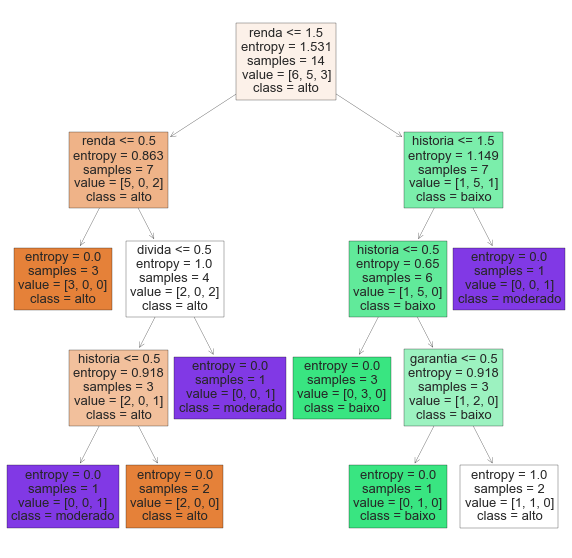

In [22]:
previsores = ['historia', 'divida', 'garantia', 'renda']
figura, eixos = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 10))
tree.plot_tree(arvore_risco_credito, feature_names = previsores, class_names = arvore_risco_credito.classes_, filled = True)

In [23]:
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0,]])
print(previsoes)

['baixo' 'alto']


## Base de dados do credit

In [29]:
arvore_credit = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_credit.fit(X_credit_treino, y_credit_treino)
previsoes = arvore_credit.predict(X_credit_teste)

accuracy = accuracy_score(y_credit_teste, previsoes)
print(accuracy * 100)

98.2


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



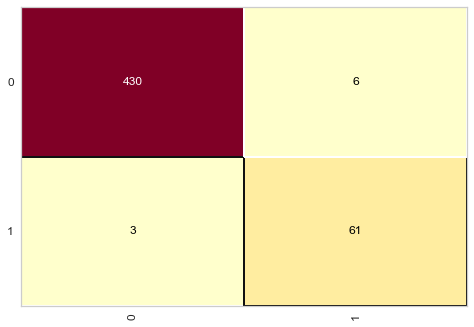

In [31]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treino, y_credit_treino)
cm.score(X_credit_teste, y_credit_teste)

print(classification_report(y_credit_teste, previsoes))

## Base de dados Census

A accuracy é 81.04% 

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



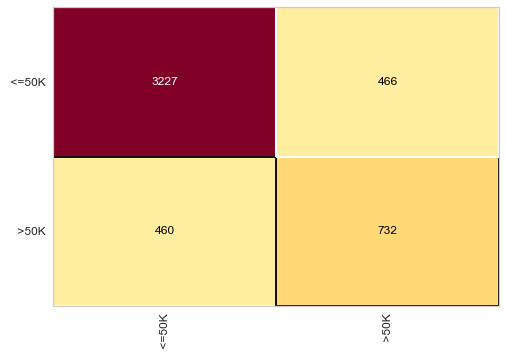

In [47]:
arvore_census = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_census.fit(X_census_treino, y_census_treino)

previsoes = arvore_census.predict(X_census_teste)

accuracy = accuracy_score(y_census_teste, previsoes)
print(f'A accuracy é {accuracy * 100:.2f}% \n')

cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treino, y_census_treino)
cm.score(X_census_teste, y_census_teste)

print(classification_report(y_census_teste, previsoes))